# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [39]:
# Load the data set from the csv file into DataFrame

df = pd.read_csv('SeoulBikeData.csv')
df.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes


In [40]:
# Summarise in text using one pandas function (describe)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

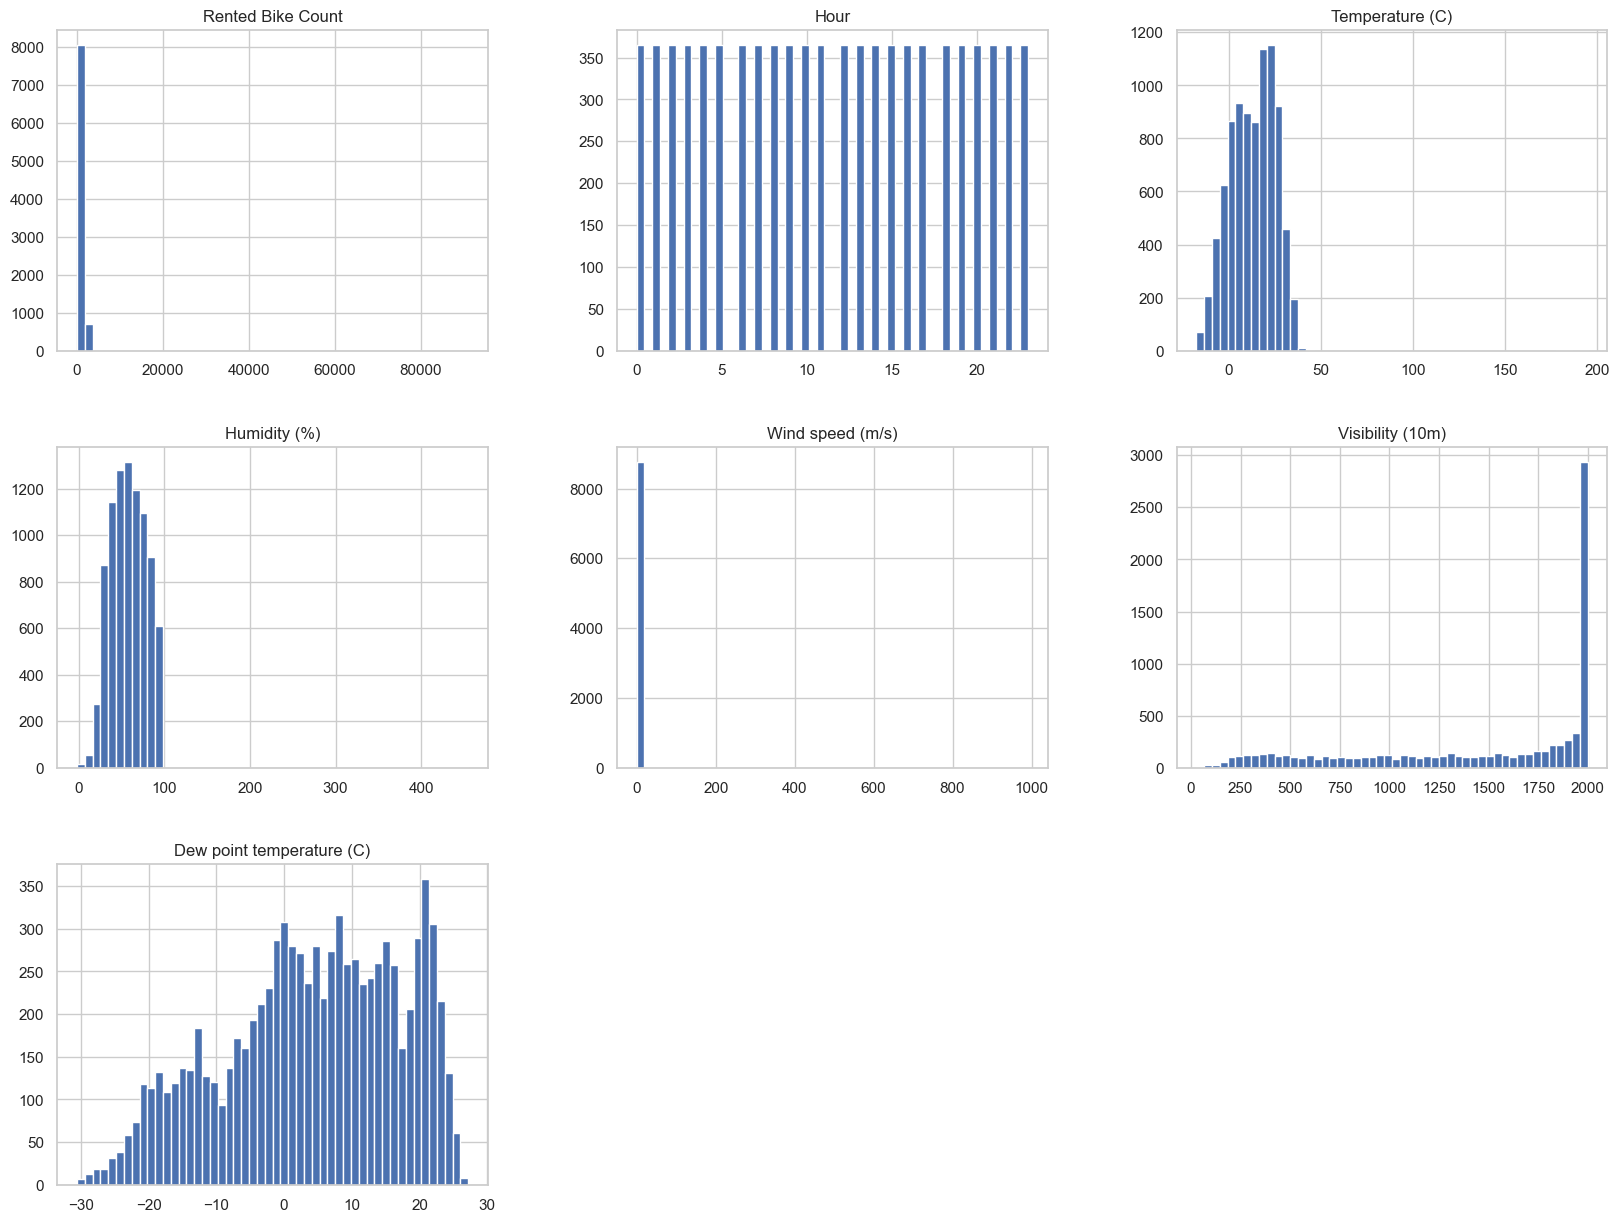

In [41]:
# Visualise each feature

df.hist(bins=50, figsize=(20,15))
plt.show()

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Weekday** feature with a binary weekday feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [42]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday <= 4)

In [43]:
# Remove rows where the business is closed and delete the "Functioning Day" feature

df = df[df['Functioning Day'] == 'Yes']
df.drop(columns=['Functioning Day'], inplace=True)

In [44]:
# Convert Seasons to one-hot encoded format

df = pd.get_dummies(df, columns=['Seasons'])

In [45]:
# Replace the Weekday feature with a binary weekday feature

df['Weekday'] = df['Date'].apply(date_is_weekday)

df.drop(columns=['Date'], inplace=True)

In [46]:
# Convert remaining non-numerical features to numerical format

df['Holiday'] = df['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   float64
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   object 
 8   Rainfall(mm)               8465 non-null   object 
 9   Snowfall (cm)              8465 non-null   object 
 10  Holiday                    8465 non-null   int64  
 11  Seasons_Autumn             8465 non-null   bool   
 12  Seasons_Spring             8465 non-null   bool   
 13  Seasons_Summer             8465 non-null   bool   
 1

In [48]:
# Convert specific features to numeric, replacing non-convertible values with NaN
numeric_columns = ['Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [49]:
# Convert the one-hot encoded "Seasons" columns from bool to int
season_columns = ['Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']
for column in season_columns:
    df[column] = df[column].astype(int)

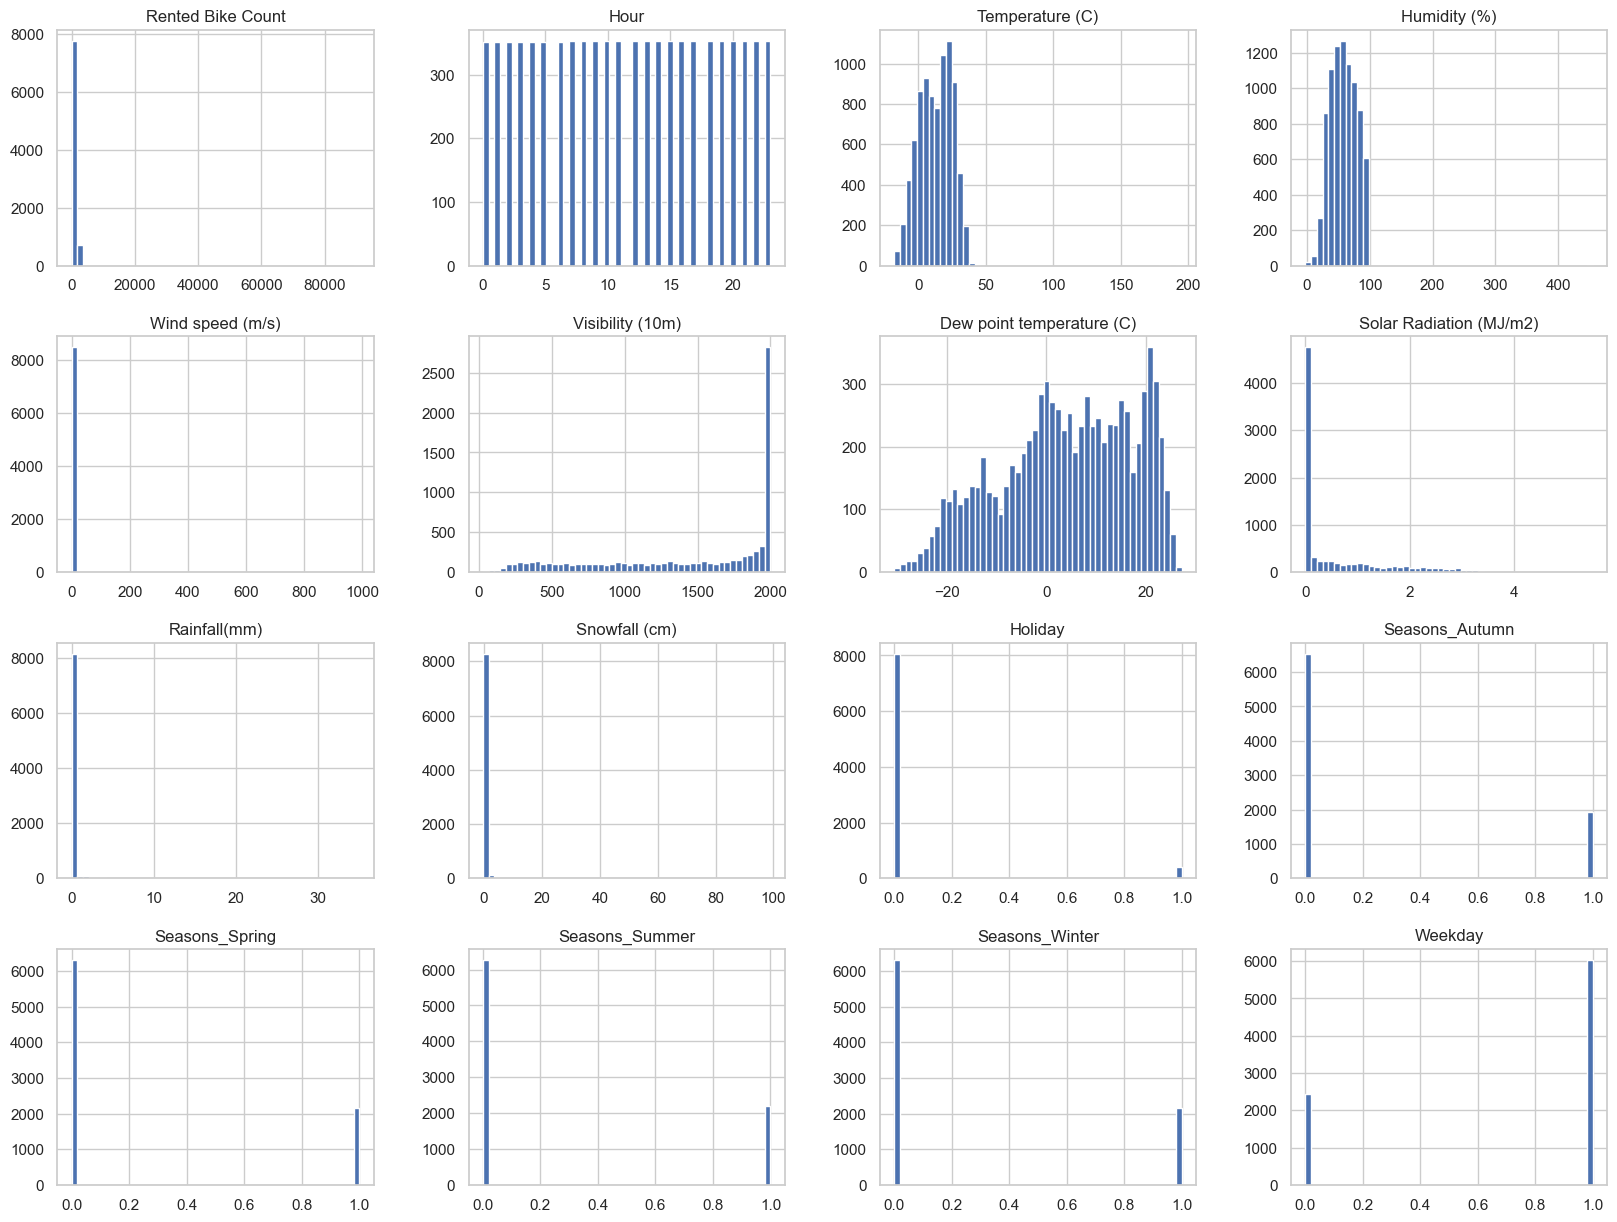

In [50]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

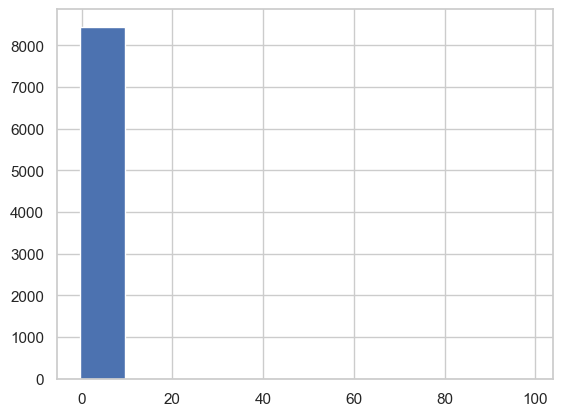

In [90]:
df['Snowfall (cm)'].hist()

In [82]:
new = df.copy()

In [83]:
new.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Weekday
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8464.000000,8444.000000,8444.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000
mean,739.789014,11.507029,12.836090,58.190408,1.854247,1433.873479,3.944997,0.567771,0.149491,0.089507,0.048198,0.228825,0.255168,0.260839,0.255168,0.711636
std,1172.685973,6.920899,12.545382,20.943092,10.847528,609.051229,13.242399,0.868830,1.126914,1.164716,0.214198,0.420101,0.435982,0.439118,0.435982,0.453028
min,2.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000,0.000000,0.000000,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000,5.520000,35.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
columns_to_check = ['Rented Bike Count', 'Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 
                    'Rainfall(mm)', 'Snowfall (cm)']

# Remove outliers for each specified column
for column in columns_to_check:
    new = remove_outliers(new, column)

In [85]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7509 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          7509 non-null   int64  
 1   Hour                       7509 non-null   int64  
 2   Temperature (C)            7509 non-null   float64
 3   Humidity (%)               7509 non-null   float64
 4   Wind speed (m/s)           7509 non-null   float64
 5   Visibility (10m)           7509 non-null   int64  
 6   Dew point temperature (C)  7509 non-null   float64
 7   Solar Radiation (MJ/m2)    7508 non-null   float64
 8   Rainfall(mm)               7509 non-null   float64
 9   Snowfall (cm)              7509 non-null   float64
 10  Holiday                    7509 non-null   int64  
 11  Seasons_Autumn             7509 non-null   int32  
 12  Seasons_Spring             7509 non-null   int32  
 13  Seasons_Summer             7509 non-null   int32  
 1

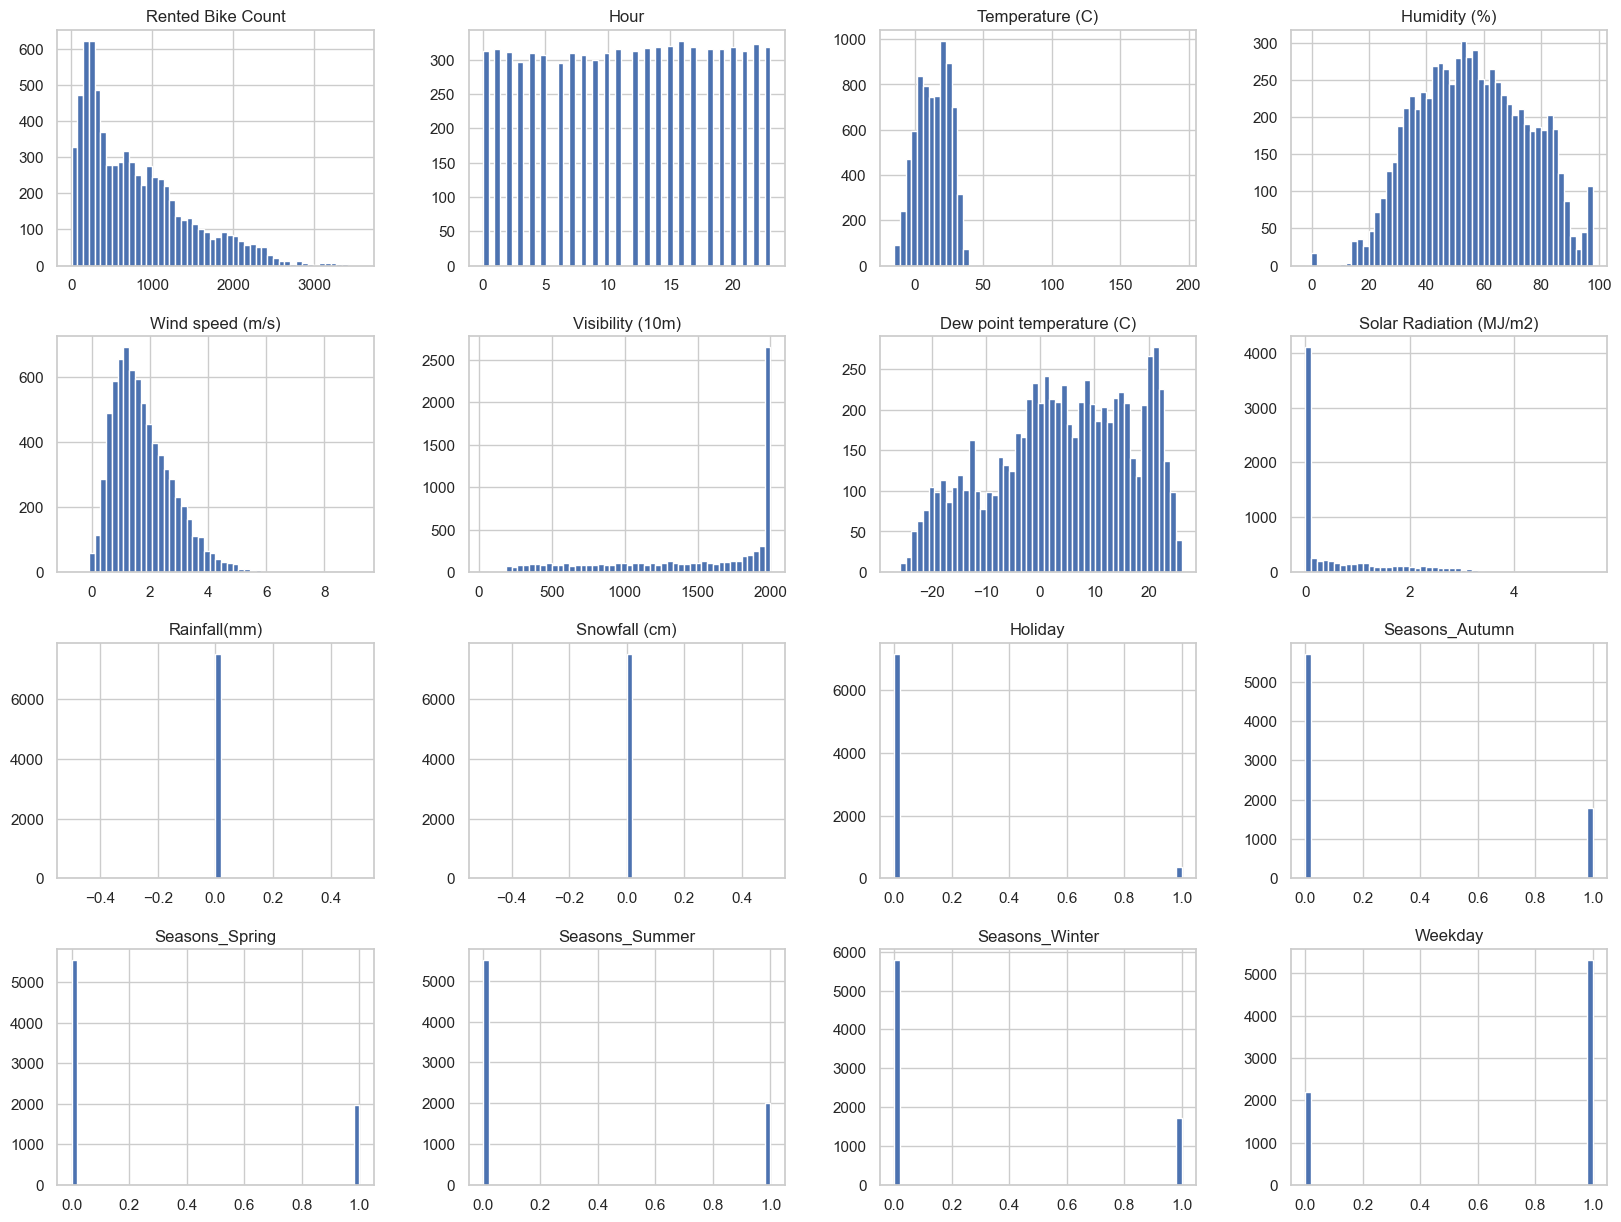

In [86]:
new.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Save the cleaned dataset to a new CSV file
df.to_csv('CleanedSeoulBikeData.csv', index=False)

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [ ]:
### Your code here


### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [1]:
### Your code and outputs here


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [2]:
### Your ChatGPT prompt


In [3]:
### Code here (with outputs)


## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

In [5]:
### Your answer here (maximum of 200 words)
